## Import relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Import csv data files

In [4]:
df = pd.read_csv("politifact_data.csv")

In [3]:
df1 = pd.read_csv("politifact_with_bio_data.csv")
df1.isna().sum()

Unnamed: 0             0
name                   0
claim date             0
claim source         138
claim                  0
issue                  0
accuracy rating        0
id.bioguide        19460
id.wikipedia       18278
name.first         18278
name.middle        22474
name.last          18278
bio.gender         18278
bio.birthday       18307
type               18278
party              18281
start              18278
end                18278
state              19460
full name          18278
dtype: int64

## Analysis of data without bio data

In [7]:
df.head()

,name,claim date,claim source,claim,issue,accuracy rating,fact checker,fact check ruling date,url,page_num
0,Mandela Barnes,"August 17, 2022",Twitter,“Ron Johnson just came out in favor of a feder...,abortion,barely-true,Laura Schulte,"September 13, 2022",https://www.politifact.com/factchecks/2022/sep...,1
1,CatholicVote,"August 17, 2022",an ad,Three churches were targeted during arson atta...,abortion,barely-true,Tom Kertscher,"September 1, 2022",https://www.politifact.com/factchecks/2022/sep...,1
2,Mark Kelly,"August 5, 2022",an ad,Blake Masters “wants to pass a national ban on...,abortion,mostly-true,Tom Kertscher,"August 26, 2022",https://www.politifact.com/factchecks/2022/aug...,1
3,Stacey Abrams,"August 4, 2022",an ad,"""Brian Kemp wants to investigate and punish wo...",abortion,false,Tom Kertscher,"August 12, 2022",https://www.politifact.com/factchecks/2022/aug...,1
4,Beto O'Rourke,"June 27, 2022",an Instagram post,"""Under Abbott, Texas leads the nation in rape ...",abortion,mostly-true,Nusaiba Mizan,"August 9, 2022",https://www.politifact.com/factchecks/2022/aug...,1


<b> There are 10 features and 26206 rows of data in the dataset. </b>

In [8]:
df.isna().sum()
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [9]:
df.shape

(26014, 11)

In [10]:
true = ['mostly-true', 'TRUE']
false = ['barely-true', 'FALSE', 'half-true', 'pants-fire']
df['accuracy'] = df['accuracy rating'].apply(lambda x: 0 if x in false else 1) # assign numerical value to labels

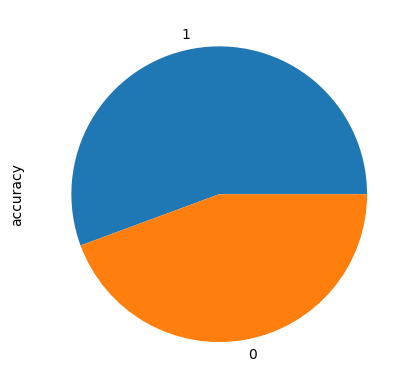

1    14473
0    11541
Name: accuracy, dtype: int64


In [11]:
df['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df['accuracy'].value_counts())

There are 14473 mostly false data points and 11541 mostly true data points in df.

In [15]:
num_unique_issues = df['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 87 unique issues.


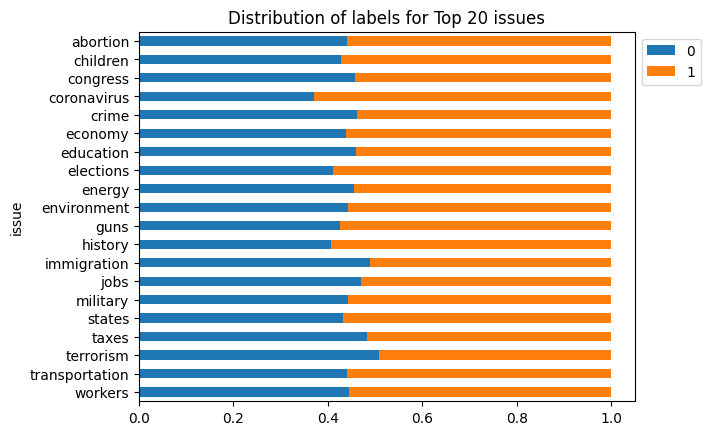

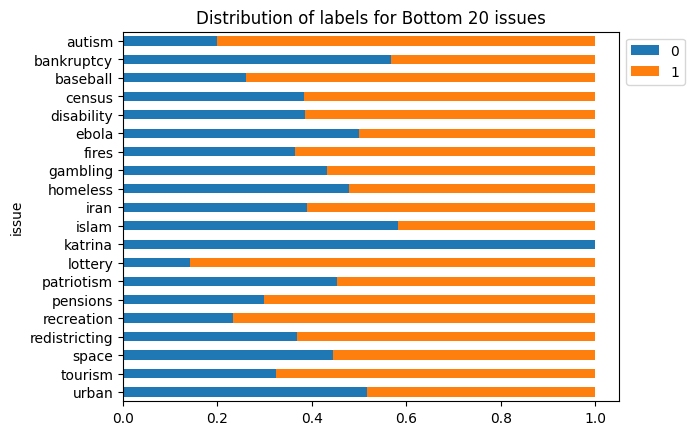

In [18]:
top_20_issues = df.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df[df['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df[df['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

## Analysis of data with bio data

In [4]:
df1.drop(columns=['name.middle','name.last','name.first'],inplace=True)
df1.dropna(inplace=True)
df1.reset_index(inplace=True)

In [5]:
df1.shape

(6396, 18)

There are 18 features with 6396 rows of data.

In [7]:
df1['accuracy rating'].unique()

array(['mostly-true', 'barely-true', 'half-true', 'FALSE', 'TRUE',
       'pants-fire'], dtype=object)

In [13]:
true = ['mostly-true', 'TRUE']
false = ['barely-true', 'FALSE', 'half-true', 'pants-fire']
df1['accuracy'] = df1['accuracy rating'].apply(lambda x: 0 if x in false else 1) # assign numerical value to labels

Plots on the different features for df1 (with bio data)

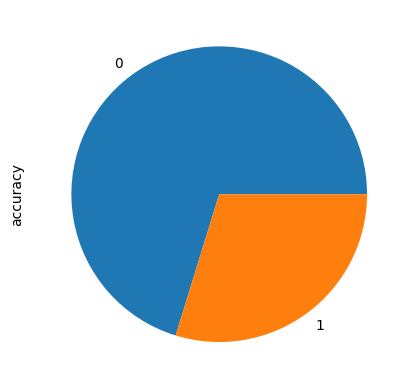

0    18207
1     7716
Name: accuracy, dtype: int64


In [14]:
df1['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df1['accuracy'].value_counts())

There are 18207 mostly false data points and 7716 mostly true data points in df1.

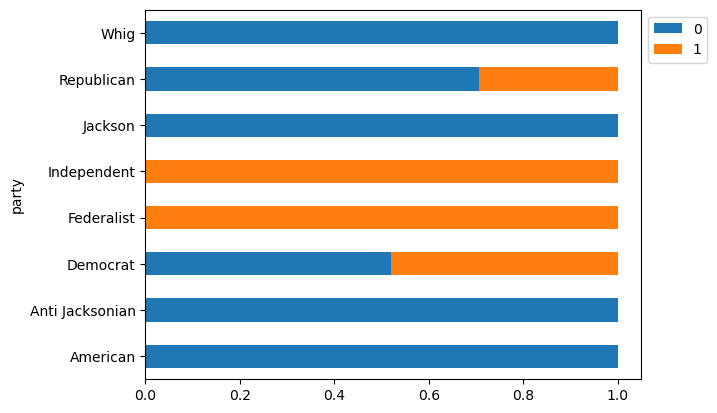

In [10]:
df1.groupby(by=['party'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

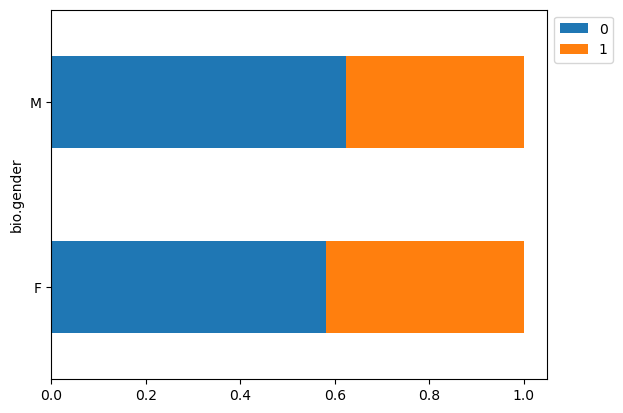

In [11]:
df1.groupby(by=['bio.gender'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

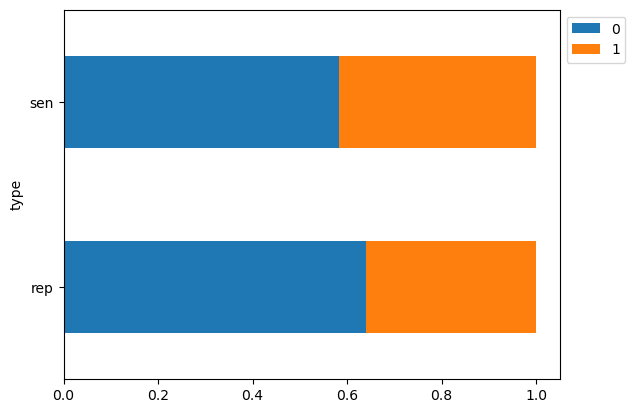

In [12]:
df1.groupby(by=['type'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [13]:
num_unique_issues = df1['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 85 unique issues.


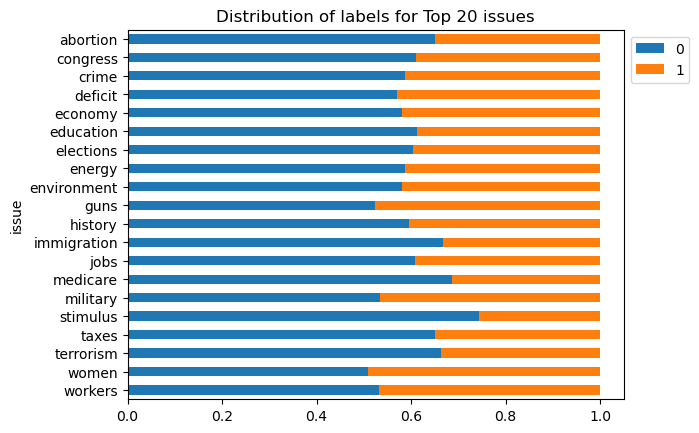

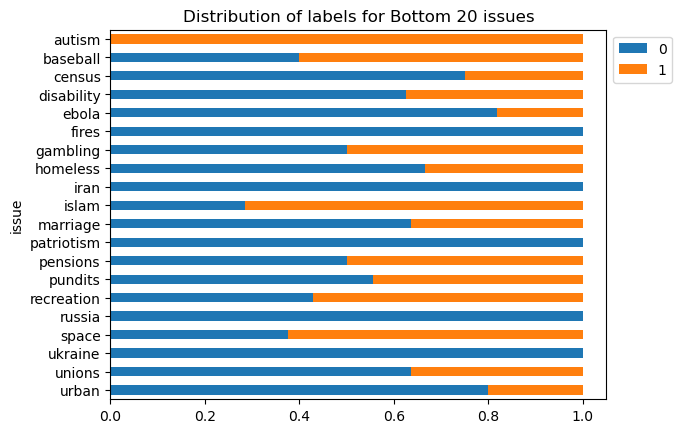

In [14]:
top_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df1[df1['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df1[df1['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

In [69]:
df1.to_csv("Politifact with biodata NA dropped.csv")